In [83]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('../data/train.csv')

In [10]:
df_train[df_train.location.notnull()]

id  keyword                       location  \
31       48   ablaze                     Birmingham   
32       49   ablaze  Est. September 2012 - Bristol   
33       50   ablaze                         AFRICA   
34       52   ablaze               Philadelphia, PA   
35       53   ablaze                     London, UK   
...     ...      ...                            ...   
7575  10826  wrecked                             TN   
7577  10829  wrecked         #NewcastleuponTyne #UK   
7579  10831  wrecked              Vancouver, Canada   
7580  10832  wrecked                        London    
7581  10833  wrecked                        Lincoln   

                                                   text  target  
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...       1  
32    We always try to bring the heavy. #metal #RT h...       0  
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...       1  
34                   Crying out for more! Set me ablaze       0  
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...       0  
...                                                 ...     ...  
7575  On the bright side I wrecked http://t.co/uEa0t...       0  
7577  @widda16 ... He's gone. You can relax. I thoug...       0  
7579  Three days off from work and they've pretty mu...       0  
7580  #FX #forex #trading Cramer: Iger's 3 words tha...       0  
7581  @engineshed Great atmosphere at the British Li...       0  

[5080 rows x 5 columns]

In [11]:
# what is the split of this dataset 
df_train.target.value_counts()
#ok we are not so imbalanced

0    4342
1    3271
Name: target, dtype: int64

### Keyword analysis

In [25]:
#how many tweets have keywords
print(f'Total tweets: {df_train.shape[0]}\nTweets without Location values: {df_train.keyword.isna().sum()}')

Total tweets: 7613
Tweets without Location values: 61


In [23]:
#what is the split if we have a keyword
df_train[df_train.keyword.notnull()].target.value_counts()

0    4323
1    3229
Name: target, dtype: int64

In [24]:
#what if we dont have a keyword
df_train[df_train.keyword.isna()].target.value_counts()
#this shows us that without a keyword, the training set has a skewed amount of positive tweets than negative.

1    42
0    19
Name: target, dtype: int64

In [29]:
#how many keywords are there, that is being tracked
df_train.keyword.value_counts()
#ok so 221 keywords

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [31]:
# just a quick check, what is the distribution based only on the keyword 'wrecked'.
# I am looking at this because i know this is a word that is commonly used to describe
# a shitty situation, but not necessarily 
df_train[df_train.keyword == 'wrecked'].target.value_counts()

# as suspected, some keywords are CLEAR indicators that the tweek is not about a disaster
# with even a simple imputer on just location and keyword, we should be able to learn a good deal
# one core issue with this is whether the training set is reflective of the testing set. 
# we will see.....


0    36
1     3
Name: target, dtype: int64

### Location analysis

<li> how many locations are there? </li>
<li> disasters happen in geographic locations, so these should be important </li>
<li> how specific are these locations </li>
<li> can I use a rough analysis of the spcificity of the location to create a new feature </li>




In [74]:
#how many locatiosn are there
df_train.shape[0]/df_train.location.nunique()
#ok so as expected, there are many more of these.

2.278659084106555

I am much less confident in using locations to predict anyhting.

this is because there is on average 2.27 tweets per location.

What the fuck do you think im going to do, base my predcition on 2 other tweets?

The high variance is good, but I want to approach this very cautiously 

------------------------------------ 
### Text analysis

This is not so interesting to do an early search for me, but some ideas

if a tweet has an image, is it more likely to be a positive case? what about the oposite?

length of a tweet, we can check this really fast(i will below)

In [75]:
df_train['tweet_length'] = df_train.text.apply(len)

In [79]:
#sanity 
len(df_train.loc[0].text), df_train.tweet_length[0]

(69, 69)

Tweet length of real disasters


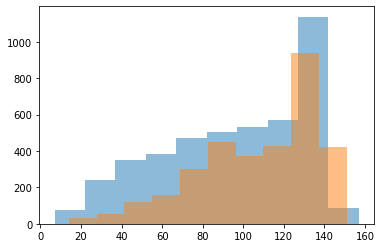

In [89]:
#lets look at the distribuion of lengths of tweets as they relate to target variable
df_p = df_train[df_train.target == 0]
df_n = df_train[df_train.target == 1]

print('Tweet length of real disasters')
plt.hist(df_p.tweet_length,alpha = 0.5)
plt.hist(df_n.tweet_length,alpha = 0.5)
plt.show()

#### Thats actually pretty interesting, we dont see a very striking difference between the tweet length distributions